In [32]:
from __future__ import unicode_literals, print_function, division
import unicodedata
import random
import re

import os
import pickle
import tarfile
import wget
import zipfile  # Importing zipfile for .zip extraction

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
%matplotlib inline


In [80]:
def make_tgz_and_zip(url, download_folder):
    """
    Downloads a compressed file (.tgz or .zip) from a URL, saves it to a specified folder,
    and then extracts its content.

    Args:
        url (str): The URL of the compressed file.
        download_folder (str): The path to the folder where the file should be saved and extracted.
    """
    try:
        # Ensure that the download folder exists, create it if it doesn't
        os.makedirs(download_folder, exist_ok=True)

        # Download the file from the given URL and save it to the download folder
        filename = wget.download(url, out=download_folder)
        print(f"\nDownloaded: {filename}")

        # Check if the file is a .tgz (tar.gz) archive
        if filename.endswith(".tgz"):
            with tarfile.open(filename, "r:gz") as tar:
                # Extract all contents of the .tgz file to the specified folder
                tar.extractall(path=download_folder, filter=None)  # Removed `filter=None`
            print(f"Extracted .tgz to: {download_folder}")

        # Check if the file is a .zip archive
        elif filename.endswith(".zip"):
            with zipfile.ZipFile(filename, "r") as zip_ref:
                # Extract all contents of the .zip file to the specified folder
                zip_ref.extractall(path=download_folder)
            print(f"Extracted .zip to: {download_folder}")

        # If the file type is unsupported, log a message and exit the function
        else:
            print(f"Unsupported file format: {filename}")
            return

        # Remove the downloaded file after extraction to save storage space
        os.remove(filename)
        print(f'Removed: {filename}')

    # Handle any exceptions that occur during the process and log the error
    except Exception as e:
        print(f"An error occurred: {e}")

In [81]:
# URL of the .tgz compressed Europarl dataset file containing French-English parallel data
url2 = "https://www.statmt.org/europarl/v7/fr-en.tgz"

# Call the function to download the .tgz file from the provided URL, store it in the "data" folder,
# and extract its contents into the same folder
make_tgz_and_zip(url2, "data")


Downloaded: data/fr-en.tgz


/tmp/ipykernel_14384/3839353119.py:21: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=download_folder, filter=None)  # Removed `filter=None`


Extracted .tgz to: data
Removed: data/fr-en.tgz


In [121]:
# URL of the .zip file containing specified PyTorch tutorial data
url3 = "https://download.pytorch.org/tutorial/data.zip"

# Call the function to download the .zip file from the URL, save it in the "data" folder,
# and extract its contents into the same folder
make_tgz_and_zip(url3, "data")


Downloaded: data/data.zip
Extracted .zip to: data
Removed: data/data.zip


In [83]:
# Import necessary modules
import string  # Provides constants and tools to work with strings
import re  # Used for performing regex operations for text cleaning
from unicodedata import normalize  # Helps with Unicode normalization (e.g., converting accented chars)
from pickle import dump  # Used to serialize Python objects and save them to files


# Function to load a document into memory
def load_doc(filename):
    """
    Read the content of a file into memory.

    Args:
        filename (str): Path to the file.

    Returns:
        str: Content of the file as a string.
    """
    # Open the file in text mode with UTF-8 encoding
    file = open(filename, mode="rt", encoding="utf-8")
    # Read the entire content of the file
    text = file.read()
    # Close the file after reading content
    file.close()
    return text


# Function to split a document into individual sentences
def to_sentences(doc):
    """
    Split a document into a list of sentences based on newlines.

    Args:
        doc (str): The document content as a string.

    Returns:
        list: A list of string sentences.
    """
    return doc.strip().split('\n')


# Function to clean a list of text lines
def clean_lines(lines):
    """
    Preprocess and clean text data by removing unwanted characters, punctuation, and numbers.

    Args:
        lines (list of str): Lines of text to be cleaned.

    Returns:
        list of str: Cleaned text lines.
    """
    cleaned = list()
    # Regular expression to match non-printable characters
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    # Translation table to remove all punctuation characters
    table = str.maketrans('', '', string.punctuation)

    # Process each line in the list
    for line in lines:
        # Normalize unicode characters (e.g., accented letters to their ASCII equivalents)
        line = normalize('NFD', line).encode('ascii', 'ignore')
        line = line.decode("utf-8")
        # Split the line into tokens based on whitespace
        line = line.split()
        # Convert all tokens to lowercase
        line = [word.lower() for word in line]
        # Remove punctuation from each token using the translation table
        line = [word.translate(table) for word in line]
        # Remove non-printable characters using regex
        line = [re_print.sub('', w) for w in line]
        # Remove tokens containing numbers
        line = [word for word in line if word.isalpha()]
        # Combine the cleaned tokens back into a single string
        cleaned.append(' '.join(line))

    return cleaned


# Function to save cleaned sentences to a file
def save_clean_sentences(sentences, filename):
    """
    Save a list of cleaned sentences to a file using pickle.

    Args:
        sentences (list): List of cleaned sentences to save.
        filename (str): The output file path for saving the sentences.
    """
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)


# Load, clean, and save English data
filename = 'data/europarl-v7.fr-en.en'  # Path to the English dataset file
# Load the English dataset into memory as a string
doc = load_doc(filename)
# Split the document into separate sentences
sentences = to_sentences(doc)
# Clean each sentence in the list
sentences = clean_lines(sentences)
# Save the cleaned sentences to a file
save_clean_sentences(sentences, 'data/english.pkl')
# Display the first 10 cleaned sentences for verification
for i in range(10):
    print(sentences[i])

# Load, clean, and save French data
filename = 'data/europarl-v7.fr-en.fr'  # Path to the French dataset file
# Load the French dataset into memory as a string
doc = load_doc(filename)
# Split the document into separate sentences
sentences = to_sentences(doc)
# Clean each sentence in the list
sentences = clean_lines(sentences)
# Save the cleaned sentences to a file
save_clean_sentences(sentences, 'data/french.pkl')
# Display the first 10 cleaned sentences for verification
for i in range(10):
    print(sentences[i])

Saved: data/english.pkl
resumption of the session
i declare resumed the session of the european parliament adjourned on friday december and i would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period
although as you will have seen the dreaded millennium bug failed to materialise still the people in a number of countries suffered a series of natural disasters that truly were dreadful
you have requested a debate on this subject in the course of the next few days during this partsession
in the meantime i should like to observe a minute s silence as a number of members have requested on behalf of all the victims concerned particularly those of the terrible storms in the various countries of the european union
please rise then for this minute s silence
the house rose and observed a minute s silence
madam president on a point of order
you will be aware from the press and television that there have been a number of bomb explosions and killings i

In [125]:
# Load the French vocabulary from the pickled file `french.pkl` located in the `data` directory.
with open('data/french.pkl', 'rb') as f:
    fr_voc = pickle.load(f)

# Load the English vocabulary from the pickled file `english.pkl` located in the `data` directory.
with open('data/english.pkl', 'rb') as f:
    eng_voc = pickle.load(f)

# Combine the English and French vocabularies into a pandas DataFrame.
# Each row in the DataFrame corresponds to a pair of English and French sentences.
data = pd.DataFrame(zip(eng_voc, fr_voc), columns=['English', 'French'])

# Display the DataFrame to verify its contents. This allows for a quick inspection of the combined data.
data

,English,French
0,resumption of the session,reprise de la session
1,i declare resumed the session of the european ...,je declare reprise la session du parlement eur...
2,although as you will have seen the dreaded mil...,comme vous avez pu le constater le grand bogue...
3,you have requested a debate on this subject in...,vous avez souhaite un debat a ce sujet dans le...
4,in the meantime i should like to observe a min...,en attendant je souhaiterais comme un certain ...
...,...,...
2007718,i would also like although they are absent to ...,je me permettrai meme bien quils soient absent...
2007719,i am not going to reopen the millennium or not...,je ne rouvrirai pas le debat sur le millenaire...
2007720,adjournment of the session,interruption de la session
2007721,i declare the session of the european parliame...,je declare interrompue la session du parlement...


In [126]:
# Display a concise summary of the DataFrame `data`
# `info()` provides information like column names, non-null counts, data types, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007723 entries, 0 to 2007722
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   English  object
 1   French   object
dtypes: object(2)
memory usage: 30.6+ MB


In [127]:
# Display the first 5 rows of the DataFrame `data`.
# This provides a quick insight into the structure and content of the dataset, 
# including the column names and a preview of data values.
data.head()

,English,French
0,resumption of the session,reprise de la session
1,i declare resumed the session of the european ...,je declare reprise la session du parlement eur...
2,although as you will have seen the dreaded mil...,comme vous avez pu le constater le grand bogue...
3,you have requested a debate on this subject in...,vous avez souhaite un debat a ce sujet dans le...
4,in the meantime i should like to observe a min...,en attendant je souhaiterais comme un certain ...


In [128]:
# Display the last 5 rows of the DataFrame `data`.
# This method is useful for quickly checking the structure, data pattern, or any anomalies in the final rows of the dataset.
data.tail()

,English,French
2007718,i would also like although they are absent to ...,je me permettrai meme bien quils soient absent...
2007719,i am not going to reopen the millennium or not...,je ne rouvrirai pas le debat sur le millenaire...
2007720,adjournment of the session,interruption de la session
2007721,i declare the session of the european parliame...,je declare interrompue la session du parlement...
2007722,the sitting was closed at am,la seance est levee a


In [129]:
# Generate descriptive statistics of the dataset, such as mean, standard deviation, and other measures for each numerical column.
# The .T (transpose) flips the table, making rows become columns and vice versa, for improved readability of statistics.
# This provides a quick summary of the numerical attributes in the dataset, aiding in understanding data distribution.
data.describe().T

,count,unique,top,freq
English,2007723,1946680,,7091
French,2007723,1946898,,7643


In [130]:
# Check the dataset for missing values by counting the total number of null entries in each column.
# This will return a pandas Series where the indices are column names and values are the count of missing entries per column.
data.isnull().sum()

English    0
French     0
dtype: int64

In [131]:
# The `nunique()` method is used to count the number of unique values in each column of the DataFrame `data`.
# This allows us to determine the distinct entries in the 'English' and 'French' columns of the dataset.
data.nunique()

English    1946680
French     1946898
dtype: int64

In [132]:
# Load the English-French dataset stored in a tab-separated file ('eng-fra.txt') into a pandas DataFrame.
# The 'sep' parameter specifies that the file is tab-separated ('\t'),
# and the 'names' parameter assigns column names 'English' and 'French' to the DataFrame.
data2 = pd.read_csv('data/eng-fra.txt', sep='\t', names=['English', 'French'])

In [133]:
# Merge the two DataFrames (data and data2) by combining their rows, while resetting the index.
data = pd.concat([data, data2], ignore_index=True, axis=0)
# Save the resulting DataFrame into a file named 'eng-fra-2.txt' in the 'data' directory. 
# The file is saved without headers and indexes, using the tab ('\t') character as a separator.
data.to_csv('data/eng-fra-2.txt', index=False, header=False, sep='\t')

In [93]:
# Display a concise summary of the DataFrame `data`, showing column names, 
# the number of non-null values, data types, and memory usage.
# `data` refers to a DataFrame that contains English and French text data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151289 entries, 0 to 4151288
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   English  object
 1   French   object
dtypes: object(2)
memory usage: 63.3+ MB


In [94]:
# Display the first 5 rows of the DataFrame `data`.
# This provides a quick look at the structure and values of the dataset, 
# including column names and data examples.
data.head()

,English,French
0,resumption of the session,reprise de la session
1,i declare resumed the session of the european ...,je declare reprise la session du parlement eur...
2,although as you will have seen the dreaded mil...,comme vous avez pu le constater le grand bogue...
3,you have requested a debate on this subject in...,vous avez souhaite un debat a ce sujet dans le...
4,in the meantime i should like to observe a min...,en attendant je souhaiterais comme un certain ...


In [95]:
# Display the last 5 rows of the DataFrame `data`.
# This provides a quick view of the structure, data pattern, or potential irregularities 
# in the final rows of the dataset, ensuring the data integrity.
data.tail()

,English,French
4151284,"2143560,A carbon footprint is the amount of ca...",NaN
4151285,"2143561,""Death is something that we're often d...",NaN
4151286,"2143562,""Since there are usually multiple webs...",NaN
4151287,"2143563,""If someone who doesn't know your back...",NaN
4151288,"2143564,""It may be impossible to get a complet...",NaN


In [3]:
# Check if a CUDA-enabled GPU is available; use CUDA if present, otherwise default to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Display the device being used (either 'cuda' for GPU or 'cpu' for CPU)
device

device(type='cpu')

In [4]:
# Turn a Unicode string to plain ASCII by removing diacritics and normalizing
# Reference: https://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    # Normalize the string to 'NFD' form (separates base characters from their diacritical marks)
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'  # Remove characters categorized as 'Mn' (non-spacing marks)
    )


# Lowercase the string, trim extra spaces, and clean unwanted characters
def normalize_string(s):
    # Convert to lowercase and remove leading/trailing spaces
    s = unicode_to_ascii(s.lower().strip())
    # Add a space before punctuation (to maintain separation in tokenization)
    s = re.sub(r"([.!?])", r" \1", s)
    # Remove all characters except alphabetic letters and select punctuation (!, ?)
    s = re.sub(r"[^a-zA-Z!?]+", r" ", s)
    # Remove extra spaces caused by cleaning and return the trimmed string
    return s.strip()

In [5]:
SOS_token = 0
EOS_token = 1


class Lang:
    """
    This class represents a language used in translation.
    It maintains a vocabulary mapping words to unique indices, 
    counts their occurrences, and stores mappings for decoding.
    """

    def __init__(self, name):
        """
        Initializes the language object with empty vocabularies and special tokens.
        Args:
            name (str): The name of the language (e.g., 'English', 'French').
        """
        self.name = name  # Name of the language.
        self.word2index = {}  # Dictionary mapping words to unique indices.
        self.word2count = {}  # Dictionary to count occurrences of words.
        self.index2word = {0: "SOS", 1: "EOS"}  # Reverse dictionary for decoding.
        self.n_words = 2  # Start the word count with SOS and EOS tokens.

    def add_sentence(self, sentence):
        """
        Adds all the words in a given sentence to the language's vocabulary.
        Args:
            sentence (str): A sentence to process and add.
        """
        for word in sentence.split(' '):  # Split the sentence into individual words.
            self.add_word(word)  # Add each word to the vocabulary.

    def add_word(self, word):
        """
        Adds a word to the language's vocabulary or increments its count if already present.
        Args:
            word (str): The word to process.
        """
        if word not in self.word2index:  # Check if the word is not already in the vocabulary.
            self.word2index[word] = self.n_words  # Assign a new unique index to the word.
            self.word2count[word] = 1  # Initialize the word count as 1.
            self.index2word[self.n_words] = word  # Update the reverse index for decoding.
            self.n_words += 1  # Increment the total number of unique words.
        else:
            self.word2count[word] += 1  # Increment the count of the word if it exists.

In [6]:
def read_langs(lang1, lang2, reverse=False):
    """
    Reads and processes data from a file containing parallel text pairs for translation.
    
    Args:
        lang1 (str): Name of the first language (e.g., 'eng' for English).
        lang2 (str): Name of the second language (e.g., 'fra' for French).
        reverse (bool): Whether to reverse the input-output language pair.

    Returns:
        tuple: A tuple containing input language object, output language object, and processed sentence pairs.
    """
    print('Reading lines...')  # Log the start of data reading.

    # Build the file path dynamically and read all lines from the dataset.
    # Each line is expected to contain a tab-separated pair of sentences.
    lines = open('data/%s-%s-2.txt' % (lang1, lang2), encoding='utf-8').read().strip().split('\n')

    # Split each line into a pair of sentences (separated by a tab) and normalize them.
    pairs = [[normalize_string(s) for s in l.split('\t')] for l in lines]

    # If reverse is True, switch the order of languages (French to English instead of English to French).
    if reverse:
        # Reverse each sentence pair and set up reversed language instances.
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)  # French becomes the input language.
        output_lang = Lang(lang1)  # English becomes the output language.
    else:
        # Otherwise, maintain the default order of languages.
        input_lang = Lang(lang1)  # English stays as the input language.
        output_lang = Lang(lang2)  # French remains the output language.

    # Return the created language objects and the processed sentence pairs.
    return input_lang, output_lang, pairs

In [7]:
# Define the maximum number of words a sentence can contain for filtering purposes
MAX_LENGTH = 12

# Define a tuple of English sentence prefixes commonly used for filtering sentence pairs
eng_prefixes = (
    "i am ", "i m ",  # Variations of "I am" formations
    "he is", "he s ",  # Variations of "He is"
    "she is", "she s ",  # Variations of "She is"
    "you are", "you re ",  # Variations of "You are"
    "we are", "we re ",  # Variations of "We are"
    "they are", "they re ",  # Variations of "They are"
    "I don t", "Do you", "I want", "Are you", "I have", "I think",
    # Common phrases used to filter English sentences
    "I can t", "I was", "He is", "I m not", "This is", "I just", "I didn t",
    "I am", "I thought", "I know", "Tom is", "I had", "Did you", "Have you",
    "Can you", "He was", "You don t", "I d like", "It was", "You should",
    "Would you", "I like", "It is", "She is", "You can t", "He has",
    "What do", "If you", "I need", "No one", "You are", "You have",
    "I feel", "I really", "Why don t", "I hope", "I will", "We have",
    "You re not", "You re very", "She was", "I love", "You must", "I can"
)


# The eng_prefixes variable is used as a reference to quickly identify
# and filter sentence pairs with meaningful English sentence structure.

# eng_prefixes = (map(lambda x: x.lower(), eng_prefixes))  # Code to make all prefixes lowercase (if needed)
# eng_prefixes = set(eng_prefixes)  # Code to convert prefixes to a set (if adjustments are required)

def filter_pair(p):
    """
    Apply filtering conditions on a single sentence pair.

    Args:
        p (list): A pair of sentences [input_sentence (str), output_sentence (str)].

    Returns:
        bool: True if conditions are met, False otherwise.
    """
    # Ensure the pair has at least two elements before processing
    if len(p) < 2:
        return False  # Reject malformed pairs
    # Ensure sentences in the pair have fewer words than MAX_LENGTH and
    # the output sentence starts with a prefix from eng_prefixes
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filter_pairs(pairs):
    """
    Filter a list of sentence pairs based on specific conditions.

    Args:
        pairs (list of lists): List of sentence pairs.

    Returns:
        list: A filtered list of sentence pairs meeting the conditions.
    """
    # Apply the filter_pair function to each pair and return only valid pairs
    return [pair for pair in pairs if filter_pair(pair)]


# Output or inspect the defined `eng_prefixes` if required
eng_prefixes

('i am ',
 'i m ',
 'he is',
 'he s ',
 'she is',
 'she s ',
 'you are',
 'you re ',
 'we are',
 'we re ',
 'they are',
 'they re ',
 'I don t',
 'Do you',
 'I want',
 'Are you',
 'I have',
 'I think',
 'I can t',
 'I was',
 'He is',
 'I m not',
 'This is',
 'I just',
 'I didn t',
 'I am',
 'I thought',
 'I know',
 'Tom is',
 'I had',
 'Did you',
 'Have you',
 'Can you',
 'He was',
 'You don t',
 'I d like',
 'It was',
 'You should',
 'Would you',
 'I like',
 'It is',
 'She is',
 'You can t',
 'He has',
 'What do',
 'If you',
 'I need',
 'No one',
 'You are',
 'You have',
 'I feel',
 'I really',
 'Why don t',
 'I hope',
 'I will',
 'We have',
 'You re not',
 'You re very',
 'She was',
 'I love',
 'You must',
 'I can')

In [11]:
def prepare_data(lang1, lang2, reverse=False):
    """
    Prepare data for training by reading, processing, filtering, and summarizing the input and output language data.

    Args:
        lang1 (str): Name of the first language (e.g., 'eng' for English).
        lang2 (str): Name of the second language (e.g., 'fra' for French).
        reverse (bool): Whether to reverse the input-output language pair for translation.

    Returns:
        tuple: A tuple containing input language object, output language object, and filtered sentence pairs.
    """
    # Read and process data into sentence pairs, and reverse the language order if specified
    input_lang, output_lang, pairs = read_langs(lang1, lang2, reverse)
    # Print the total number of sentence pairs read from the file
    print(f'Read {len(pairs)} sentence pairs')

    # Filter out invalid or unwanted sentence pairs based on specific conditions
    pairs = filter_pairs(pairs)
    # Print the number of sentence pairs remaining after filtering
    print(f'Trimmed to {len(pairs)} sentence pairs')

    # Initialize word counting to build vocabularies for input and output languages
    print('Counting words...')
    for pair in pairs:
        # Add each word in the input sentence to the input language vocabulary
        input_lang.add_sentence(pair[0])
        # Add each word in the output sentence to the output language vocabulary
        output_lang.add_sentence(pair[1])

    # Print the total word count and language names after processing
    print('Counted words:')
    print(input_lang.name, input_lang.n_words)  # Display input language name and word count
    print(output_lang.name, output_lang.n_words)  # Display output language name and word count

    # Return the input language, output language, and the filtered sentence pairs
    return input_lang, output_lang, pairs


# Call the prepare_data function to process English ('eng') and French ('fra') text data
# with French as the input and English as the output by reversing the language pair order
input_lang, output_lang, pairs = prepare_data('eng', 'fra', True)

# Randomly select and print one filtered pair of sentences for verification
print(random.choice(pairs))

Reading lines...
Read 2143565 sentence pairs
Trimmed to 19615 sentence pairs
Counting words...
Counted words:
fra 9966
eng 7004
['je suis tellement desole !', 'i m so sorry']


In [12]:
class EncoderRNN(nn.Module):
    """
    An encoder RNN that converts a sequence of input tokens into 
    a fixed-size vector representation. It uses GRU (Gated Recurrent Unit) 
    as the recurrent architecture with an embedding layer.
    """

    def __init__(self, input_size, hidden_size, dropout_p=0.1):
        """
        Initializes the EncoderRNN.

        Args:
            input_size (int): The size of the vocabulary for the input language.
            hidden_size (int): The number of units in the hidden layers of the GRU.
            dropout_p (float): Dropout probability for the embedding layer.
        """
        super(EncoderRNN, self).__init__()  # Initialize the nn.Module base class
        self.hidden_size = hidden_size  # Store the hidden layer size

        # Embedding layer that converts input tokens (word indices) into dense vectors
        self.embedding = nn.Embedding(input_size, hidden_size)

        # GRU layer for processing sequential input data
        # Input and hidden sizes are both equal to hidden_size
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

        # Dropout layer applied to the embedding to prevent overfitting
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input):
        """
        Forward pass through the encoder.

        Args:
            input (Tensor): A tensor of shape (batch_size, seq_length) containing 
                            the indices of input words.

        Returns:
            output (Tensor): A tensor of shape (batch_size, seq_length, hidden_size)
                             containing the GRU outputs for all time steps.
            hidden (Tensor): A tensor of shape (1, batch_size, hidden_size) representing
                             the final hidden state of the GRU.
        """
        # Pass the input through the embedding layer and apply dropout
        embedded = self.dropout(self.embedding(input))

        # Process the embedded inputs through the GRU
        output, hidden = self.gru(embedded)

        # Return GRU outputs and the final hidden state
        return output, hidden

In [13]:
class DecoderRNN(nn.Module):
    """
    A Decoder RNN for sequence-to-sequence tasks, such as language translation, 
    that takes encoded representations of input sequences and produces output sequences.
    This decoder includes an embedding layer, a GRU-based recurrent layer, 
    and a fully connected output layer.
    """

    def __init__(self, hidden_size, output_size):
        """
        Initialize the decoder's network structure.
        
        Args:
            hidden_size (int): The size of the hidden state in the GRU.
            output_size (int): The size of the target vocabulary.
        """
        # Initialize the base class (nn.Module) constructor
        super(DecoderRNN, self).__init__()

        # Embedding layer to convert output tokens into dense vector representations
        self.embedding = nn.Embedding(output_size, hidden_size)

        # A GRU layer to process sequential data, where both input and hidden sizes are equal to hidden_size
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

        # A fully connected layer to map GRU outputs to vocabulary predictions
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        """
        Perform the forward pass for the decoder, generating outputs step by step.
    
        Args:
            encoder_outputs (Tensor): Unused in this vanilla decoder; reserved for attention mechanism.
            encoder_hidden (Tensor): The last hidden state from the encoder (used to initialize the decoder hidden state).
            target_tensor (Tensor, optional): Target outputs for teacher forcing. Defaults to None.
    
        Returns:
            decoder_outputs (Tensor): Predicted token probabilities for each time step.
            decoder_hidden (Tensor): The final hidden state of the decoder.
            None: Placeholder for consistency in training with attention-based models.
        """
        # Retrieve the batch size from encoder outputs
        batch_size = encoder_outputs.size(0)

        # Initialize the decoder input with the SOS token for all sequences in the batch
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)

        # Initialize the hidden state of the decoder with the final encoder hidden state
        decoder_hidden = encoder_hidden

        # Placeholder list to store the outputs for each time step
        decoder_outputs = []

        # Loop through each time step up to the maximum sequence length
        for i in range(MAX_LENGTH):
            # Perform a single decoding step (forward_step processes one token at a time)
            decoder_output, decoder_hidden = self.forward_step(decoder_input, decoder_hidden)

            # Append the predicted outputs for the current time step
            decoder_outputs.append(decoder_output)

            if target_tensor is not None:
                # Teacher forcing: Use the corresponding token from the target tensor as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1)  # Ensure the correct shape
            else:
                # Without teacher forcing: Use the most probable output token as the next input
                _, topi = decoder_output.topk(1)  # Extract the token index with the highest probability
                decoder_input = topi.squeeze(-1).detach()  # Detach from the computation graph

        # Concatenate the outputs from all time steps to form a batch-level tensor
        decoder_outputs = torch.cat(decoder_outputs, dim=1)

        # Apply log softmax to the outputs to produce log probabilities for each token
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)

        # Return the predicted outputs, the final hidden state, and `None` (reserved for attention weights)
        return decoder_outputs, decoder_hidden, None

    def forward_step(self, input, hidden):
        """
        Perform a single time step of decoding.
    
        Args:
            input (Tensor): The current input token(s) represented as word indices (batch_size x 1).
            hidden (Tensor): The current hidden state of the decoder (1, batch_size, hidden_size).
    
        Returns:
            output (Tensor): The raw output predictions for the current time step (batch_size x 1 x output_size).
            hidden (Tensor): The updated hidden state for the next time step (1, batch_size, hidden_size).
        """
        # Pass the input token through the embedding layer to get its dense vector representation
        output = self.embedding(input)

        # Apply a ReLU activation function to introduce non-linearity
        output = F.relu(output)

        # Pass the processed input and current hidden state into the GRU
        output, hidden = self.gru(output, hidden)

        # Map the GRU output to the target vocabulary space using a linear layer
        output = self.out(output)

        return output, hidden

In [14]:
class BahdanauAttention(nn.Module):
    """
    Implements Bahdanau (Additive) Attention mechanism for aligning the decoder's current 
    hidden state (query) with the encoder's hidden states (keys) to calculate a context vector.

    This module computes alignment scores for the keys using the query and produces:
    1. Attention weights: probabilities indicating relevance of each key to the given query.
    2. Context vector: weighted sum of the keys guided by the attention scores.
    """

    def __init__(self, hidden_size):
        """
        Initializes the attention mechanism with linear layers for transformation.

        Args:
            hidden_size (int): Dimensionality of the hidden states (query and keys).
        """
        super(BahdanauAttention, self).__init__()
        # Linear layer to transform the query vector.
        self.Wa = nn.Linear(hidden_size, hidden_size)

        # Linear layer to transform each key in the set of keys (encoder outputs).
        self.Ua = nn.Linear(hidden_size, hidden_size)

        # Linear layer to compute the alignment scores.
        # Outputs a scalar score for each query-key pair.
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
        """
        Computes the attention scores, weights, and resulting context vector.

        Args:
            query (Tensor): Decoder's hidden state [batch_size, 1, hidden_size].
            keys (Tensor): Encoder's output states [batch_size, seq_length, hidden_size].

        Returns:
            context (Tensor): Context vector weighted by attention [batch_size, 1, hidden_size].
            weights (Tensor): Attention weights [batch_size, 1, seq_length].
        """
        # Compute unnormalized alignment scores:
        # - Transform the query using Wa.
        # - Transform the keys using Ua.
        # - Sum the resulting vectors and apply the tanh activation.
        # - Finally, pass the result through Va to get scalar scores for each key.
        scores = self.Va(torch.tanh(self.Wa(query) + self.Ua(keys)))

        # Reshape scores for compatibility:
        # - Remove the last dimension (size 1) after Va and add one at index 1 for batching.
        scores = scores.squeeze(2).unsqueeze(1)

        # Compute normalized attention weights using softmax along the sequence length.
        weights = F.softmax(scores, dim=-1)

        # Compute the context vector as the weighted sum of keys:
        # - Perform batch matrix-multiplication of weights and keys.
        context = torch.bmm(weights, keys)

        # Return the context vector and the attention weights.
        return context, weights

In [15]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        """
        Initializes the attention-based RNN decoder with embedding, attention, GRU, and output layers.

        Args:
            hidden_size (int): Dimensionality of the hidden state in the GRU.
            output_size (int): Size of the target vocabulary.
            dropout_p (float): Dropout probability for embedding layer to prevent overfitting.
        """
        super(AttnDecoderRNN, self).__init__()
        # Embedding layer maps output token indices to dense vector representations (hidden_size).
        self.embedding = nn.Embedding(output_size, hidden_size)
        # Attention layer computes context vectors by aligning decoder queries with encoder outputs.
        self.attention = BahdanauAttention(hidden_size)
        # GRU processes combined embeddings and context vectors to produce new hidden states.
        self.gru = nn.GRU(2 * hidden_size, hidden_size, batch_first=True)
        # Fully connected layer maps hidden states to predicted token probabilities in the output space.
        self.out = nn.Linear(hidden_size, output_size)
        # Dropout layer prevents overfitting by randomly zeroing some embedding components.
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        """
        Performs a forward pass through the decoder for generating outputs.

        Args:
            encoder_outputs (Tensor): Encoder's output states [batch_size, seq_length, hidden_size].
            encoder_hidden (Tensor): Encoder's final hidden state [1, batch_size, hidden_size].
            target_tensor (Tensor, optional): Ground-truth target sequences for teacher forcing. Defaults to None.

        Returns:
            decoder_outputs (Tensor): Log probabilities of predicted tokens for each time step.
            decoder_hidden (Tensor): The final hidden state of the decoder after decoding all steps.
            attentions (Tensor): Attention weights for all time steps [batch_size, seq_length, MAX_LENGTH].
        """
        batch_size = encoder_outputs.size(0)  # Get the batch size from encoder outputs.
        # Initialize the decoder's input with the <SOS> token for all sequences in the batch.
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)
        # Initialize the decoder's hidden state with the encoder's final hidden state.
        decoder_hidden = encoder_hidden
        # Lists to store the decoder's output predictions and attention weights at each time step.
        decoder_outputs = []
        attentions = []

        # Iterate over the maximum decoding length (MAX_LENGTH) to generate outputs step by step.
        for i in range(MAX_LENGTH):
            # Perform one decoding step to generate the current output and hidden state.
            decoder_output, decoder_hidden, attn_weights = self.forward_step(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # Store the output prediction for the current time step.
            decoder_outputs.append(decoder_output)
            # Store the attention weights for the current time step.
            attentions.append(attn_weights)

            if target_tensor is not None:
                # Teacher forcing mode: Use the target token as the input for the next time step.
                decoder_input = target_tensor[:, i].unsqueeze(1)  # Reshape to [batch_size, 1].
            else:
                # Without teacher forcing: Use the decoder's predicted token as the next input.
                _, topi = decoder_output.topk(1)  # Get the token with the highest probability.
                decoder_input = topi.squeeze(
                    -1).detach()  # Detach from computation graph to avoid backprop through history.

        # Concatenate all time step outputs into a single tensor [batch_size, MAX_LENGTH, output_size].
        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        # Apply log softmax to the outputs to calculate log probabilities for each token.
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        # Concatenate the attention weights for all time steps [batch_size, MAX_LENGTH, seq_length].
        attentions = torch.cat(attentions, dim=1)

        return decoder_outputs, decoder_hidden, attentions

    def forward_step(self, input, hidden, encoder_outputs):
        """
        Performs a single decoding step to generate the next token and update the hidden state.

        Args:
            input (Tensor): The current input token indices [batch_size, 1].
            hidden (Tensor): The current hidden state of the decoder [1, batch_size, hidden_size].
            encoder_outputs (Tensor): The encoder's output states [batch_size, seq_length, hidden_size].

        Returns:
            output (Tensor): Raw logits for the current time step [batch_size, 1, output_size].
            hidden (Tensor): Updated hidden state of the decoder [1, batch_size, hidden_size].
            attn_weights (Tensor): Attention weights for the current key-query pair [batch_size, 1, seq_length].
        """
        # Pass the current input token through the embedding layer and apply dropout.
        embedded = self.dropout(self.embedding(input))

        # Transform the hidden state into a query for computing attention over encoder outputs.
        query = hidden.permute(1, 0, 2)  # Reshape hidden state to [batch_size, 1, hidden_size].
        # Compute the context vector and attention weights using Bahdanau attention.
        context, attn_weights = self.attention(query, encoder_outputs)
        # Concatenate the embeddings and context vector along the feature dimension.
        input_gru = torch.cat((embedded, context), dim=2)

        # Pass the concatenated input through the GRU to compute the next hidden state.
        output, hidden = self.gru(input_gru, hidden)
        # Map the GRU output to the output vocabulary using the fully connected layer.
        output = self.out(output)

        return output, hidden, attn_weights

In [16]:
def indexes_from_sentence(lang, sentence):
    """
    Converts a sentence into a list of word indices based on the given language's vocabulary.

    Args:
        lang (Lang): Language object containing word-to-index mapping.
        sentence (str): Input sentence as a string.

    Returns:
        list: List of word indices for words in the sentence.
    """
    # Split the sentence into words and convert each word to its corresponding index.
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensor_from_sentence(lang, sentence):
    """
    Converts a sentence into a PyTorch tensor representation with the EOS token.

    Args:
        lang (Lang): Language object containing word-to-index mapping.
        sentence (str): Input sentence as a string.

    Returns:
        Tensor: Tensor of word indices for the sentence, including the EOS token.
    """
    # Get the indices for the words in the sentence.
    indexes = indexes_from_sentence(lang, sentence)
    # Add the end-of-sequence (EOS) token to the indices list.
    indexes.append(EOS_token)
    # Convert the list of indices into a PyTorch tensor and reshape to (1, sequence_length).
    return torch.tensor(indexes, dtype=torch.long, device=device).view(1, -1)


def tensors_from_pair(pair):
    """
    Converts a pair of sentences into corresponding tensor representations.

    Args:
        pair (tuple): A pair of sentences (input_sentence, target_sentence).

    Returns:
        tuple: A tuple containing the input sentence tensor and the target sentence tensor.
    """
    # Convert the input and target sentences into PyTorch tensors.
    input_tensor = tensor_from_sentence(input_lang, pair[0])
    target_tensor = tensor_from_sentence(output_lang, pair[1])
    return (input_tensor, target_tensor)


def get_dataloader(batch_size):
    """
    Prepares a DataLoader for training with batched input and target tensors.

    Args:
        batch_size (int): Number of training samples per batch.

    Returns:
        tuple: Input language, output language, and the DataLoader instance.
    """
    # Prepare the English-French dataset and retrieve language objects and sentence pairs.
    input_lang, output_lang, pairs = prepare_data('eng', 'fra', True)

    # Get the total number of sentence pairs.
    n = len(pairs)

    # Initialize zero-filled arrays for input and target sequences with fixed length.
    input_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)
    target_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)

    # Convert each sentence pair into indices and populate the input and target arrays.
    for idx, (inp, tgt) in enumerate(pairs):
        # Convert input and target sentences into lists of word indices.
        inp_ids = indexes_from_sentence(input_lang, inp)
        tgt_ids = indexes_from_sentence(output_lang, tgt)
        # Add the EOS token to mark the end of sequences.
        inp_ids.append(EOS_token)
        tgt_ids.append(EOS_token)
        # Fill the respective positions in the input and target arrays.
        input_ids[idx, :len(inp_ids)] = inp_ids
        target_ids[idx, :len(tgt_ids)] = tgt_ids

    # Create a TensorDataset from the input and target tensors.
    train_data = TensorDataset(torch.LongTensor(input_ids).to(device), torch.LongTensor(target_ids).to(device))

    # Use a RandomSampler to shuffle the dataset during each iteration.
    train_sampler = RandomSampler(train_data)
    # Create a DataLoader that batches the data for training.
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    # Return the input language, output language, and DataLoader instance.
    return input_lang, output_lang, train_dataloader

In [17]:
def train_epoch(dataloader, encoder, decoder, encoder_optimizer,
                decoder_optimizer, criterion):
    # Initialize the total loss for the epoch
    total_loss = 0

    # Iterate through each batch of data provided by the DataLoader
    for data in dataloader:
        # Extract input and target tensors from the current batch
        input_tensor, target_tensor = data

        # Reset the gradients of the optimizers for encoder and decoder
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        # Forward pass through the encoder to obtain outputs and final hidden state
        encoder_outputs, encoder_hidden = encoder(input_tensor)

        # Forward pass through the decoder using the encoder's outputs and hidden state
        # Teacher forcing is applied by passing the target tensor to the decoder
        decoder_outputs, _, _ = decoder(encoder_outputs, encoder_hidden, target_tensor)

        # Calculate the loss between predicted decoder outputs and target tensor
        loss = criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)),  # Reshape decoder outputs
            target_tensor.view(-1)  # Reshape target tensor
        )

        # Backward pass: calculate gradients for all model parameters
        loss.backward()

        # Update encoder and decoder weights using their respective optimizers
        encoder_optimizer.step()
        decoder_optimizer.step()

        # Accumulate the total loss for the epoch
        total_loss += loss.item()

    # Return the average loss over all batches in the epoch
    return total_loss / len(dataloader)

In [18]:
import time
import math


def convert_seconds_to_minutes(s):
    """
    Convert seconds to a minutes and seconds formatted string.
    
    Args:
        s (int/float): Time duration in seconds.
    
    Returns:
        str: Formatted string in the format 'Xm Ys'.
    """
    m = math.floor(s / 60)  # Calculate the total minutes by dividing seconds by 60.
    s -= m * 60  # Calculate the remaining seconds after extracting minutes.
    return '%dm %ds' % (m, s)  # Return a string formatted as 'Xm Ys'.


def time_since(since, percent):
    """
    Calculate and display elapsed time and the estimated remaining time for a process.
    
    Args:
        since (float): The start time in seconds (obtained with time.time()).
        percent (float): A percentage value (between 0 and 1) indicating progress of the process.
        
    Returns:
        str: A string showing time passed and estimated remaining time in the format 
             'time_passed (- estimated_remaining_time)'.
    """
    now = time.time()  # Get the current time in seconds.
    s = now - since  # Calculate the elapsed time by subtracting the start time.
    es = s / percent  # Estimate the total time by dividing elapsed time by completion percent.
    rs = es - s  # Compute the remaining time required for the process to complete.
    return '%s (- %s)' % (convert_seconds_to_minutes(s), convert_seconds_to_minutes(rs))  # Format output.

In [19]:
def train(train_dataloader, encoder, decoder, n_epochs, learning_rate=0.001,
          print_every=100, plot_every=100):
    """
    Trains the given encoder and decoder models over multiple epochs while logging the loss 
    and generating a plot of loss trends over time.

    Args:
        train_dataloader (DataLoader): DataLoader for training data batches (input-output pairs).
        encoder (nn.Module): Encoder RNN model for processing input sequences.
        decoder (nn.Module): Decoder RNN model for generating output sequences.
        n_epochs (int): Number of training iterations (epochs) on the dataset.
        learning_rate (float): Learning rate for the optimizer. Default is 0.001.
        print_every (int): Frequency (in terms of epochs) of printing loss to the console. Default is 100.
        plot_every (int): Frequency (in terms of epochs) of recording loss for plotting. Default is 100.
    """
    start = time.time()  # Record the starting time to calculate elapsed time.
    plot_losses = []  # List to store losses to visualize the improvement over epochs.
    print_loss_total = 0  # Cumulative loss for console printing (resets after every `print_every`).
    plot_loss_total = 0  # Cumulative loss for plotting (resets after every `plot_every`).

    # Optimizers for the encoder and decoder models, using Adam optimizer with the specified learning rate.
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

    # Criterion (loss function) to compute the negative log-likelihood loss for output predictions.
    criterion = nn.NLLLoss()

    # Loop through the specified number of training epochs.
    for epoch in range(1, n_epochs + 1):
        # Train the model for one epoch and calculate the average loss.
        loss = train_epoch(train_dataloader, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)

        # Add the epoch loss to both cumulative counters (for printing and plotting).
        print_loss_total += loss
        plot_loss_total += loss

        # If current epoch is a multiple of `print_every`, print average loss for past `print_every` epochs.
        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every  # Calculate the average loss.
            print_loss_total = 0  # Reset the print loss total.
            # Print the elapsed time, current epoch, progress percentage, and average loss.
            print('%s (%d %d%%) %.4f' % (time_since(start, epoch / n_epochs),
                                         epoch, epoch / n_epochs * 100, print_loss_avg))

        # If current epoch is a multiple of `plot_every`, record average loss for later visualization.
        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every  # Calculate the average loss for plotting.
            plot_losses.append(plot_loss_avg)  # Append the average loss to the list.
            plot_loss_total = 0  # Reset the plot loss total.

    # Generate and display a plot of loss trends over the training process.
    show_plot(plot_losses)

In [34]:
# Import the ticker module from Matplotlib for controlling tick intervals on the plot axes.
import matplotlib.ticker as ticker
# Importing NumPy for numerical manipulations (though not directly used here in this function).
import numpy as np


def show_plot(points):
    """
    Plots the given points and applies formatted tick intervals for better readability.

    Args:
        points (list or array-like): A sequence of numerical data to be plotted on the y-axis.
    """
    # Create a new figure for the plot.
    plt.figure()
    # Create a subplot in the current figure, returning the axis object for customization.
    fig, ax = plt.subplots()
    # Define tick intervals for the y-axis, setting ticks to occur every 0.2 units.
    loc = ticker.MultipleLocator(base=0.2)
    # Apply the tick interval configuration to the y-axis.
    ax.yaxis.set_major_locator(loc)
    # Plot the input points on the figure, using default line style and color.
    plt.plot(points)

In [21]:
def evaluate(encoder, decoder, sentence, input_lang, output_lang):
    """
    Evaluate a given input sentence by passing it through the encoder and decoder 
    to predict the translated output sentence.

    Args:
        encoder (nn.Module): The trained encoder model.
        decoder (nn.Module): The trained decoder model with attention.
        sentence (str): Input sentence to be translated.
        input_lang (Lang): Language object for the input sentence containing vocabulary mapping.
        output_lang (Lang): Language object for the output sentence containing vocabulary mapping.

    Returns:
        list: The predicted output sentence as a list of words.
        Tensor: The attention weights generated for the input sentence.
    """
    # Turn off gradient computation during evaluation for efficiency
    with torch.no_grad():
        # Convert the input sentence into a tensor of word indices
        input_tensor = tensor_from_sentence(input_lang, sentence)

        # Pass the input tensor through the encoder to get its outputs and hidden state
        encoder_outputs, encoder_hidden = encoder(input_tensor)

        # Use the decoder to generate the output sequence, passing the encoder outputs and hidden state
        decoder_outputs, decoder_hidden, decoder_attn = decoder(encoder_outputs, encoder_hidden)

        # Extract the most likely tokens from the decoder output at each time step
        _, topi = decoder_outputs.topk(1)  # topk(1) gets the index of the highest probability for each step
        decoded_ids = topi.squeeze()  # Remove unnecessary dimensions for easy processing

        # Initialize an empty list to store the translated words
        decoded_words = []

        # Iterate through the sequence of predicted token indices
        for idx in decoded_ids:
            # Stop decoding if the EOS token is encountered
            if idx.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            # Append the corresponding word for the token index to the output sentence
            decoded_words.append(output_lang.index2word[idx.item()])

    # Return the translated sentence as a list of words and the attention weights
    return decoded_words, decoder_attn

In [22]:
def evaluate_randomly(encoder, decoder, n=10):
    """
    Randomly selects `n` English-French sentence pairs from the dataset, evaluates them
    using the trained encoder-decoder models, and prints the results.
    
    Args:
        encoder (nn.Module): The trained encoder model.
        decoder (nn.Module): The trained decoder model with attention capabilities.
        n (int): The number of random sentence pairs to evaluate (default: 10).
    """
    for i in range(n):  # Iterate `n` times to evaluate `n` random sentence pairs.
        pair = random.choice(pairs)  # Randomly select a sentence pair (input-output) from the dataset.
        print('>', pair[0])  # Print the input sentence in its original language (French).
        print('=', pair[1])  # Print the corresponding expected translation (English).

        # Use the evaluate function to generate a translation for the input sentence.
        output_words, attn = evaluate(encoder, decoder, pair[0], input_lang, output_lang)

        # Join the predicted words into a complete sentence to form the translated output.
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)  # Print the model's predicted translation.
        print('')  # Print a blank line to separate results.

In [23]:
# Define the size of the hidden layer in the neural network.
# Controls the dimensionality of the learned embeddings and the model's capacity.
hidden_size = 128

# Define the batch size for training.
# This specifies how many training samples will be processed in one iteration.
batch_size = 32

# Retrieve the input language object (English), output language object (French), and the DataLoader
# for batching training data. The DataLoader handles shuffling and creating batches from the dataset.
input_lang, output_lang, train_dataloader = get_dataloader(batch_size)

# Initialize the encoder RNN with the input language vocabulary size and hidden size.
# Then, move the model to the device (CPU or GPU) for computation.
encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)

# Initialize the attention-based decoder RNN with the same hidden size and output language vocabulary size.
# Then, move the model to the device (CPU or GPU) for computation.
decoder = AttnDecoderRNN(hidden_size, output_lang.n_words).to(device)

# Train the encoder-decoder model using the training data loader for 80 epochs.
# The 'print_every' parameter specifies how often the loss is printed during training.
# The 'plot_every' parameter defines how often the loss is recorded for generating a plot later.
train(train_dataloader, encoder, decoder, 80, print_every=5, plot_every=5)

Reading lines...
Read 2143565 sentence pairs
Trimmed to 19615 sentence pairs
Counting words...
Counted words:
fra 9966
eng 7004
1m 34s (- 23m 41s) (5 6%) 1.7781
3m 26s (- 24m 5s) (10 12%) 0.9345
7m 53s (- 34m 13s) (15 18%) 0.5831
10m 4s (- 30m 13s) (20 25%) 0.3939
12m 13s (- 26m 53s) (25 31%) 0.2850
14m 54s (- 24m 50s) (30 37%) 0.2183
17m 46s (- 22m 51s) (35 43%) 0.1744
20m 12s (- 20m 12s) (40 50%) 0.1441
22m 38s (- 17m 36s) (45 56%) 0.1219
25m 27s (- 15m 16s) (50 62%) 0.1059
28m 7s (- 12m 47s) (55 68%) 0.0938
31m 15s (- 10m 25s) (60 75%) 0.0849
33m 21s (- 7m 41s) (65 81%) 0.0768
35m 39s (- 5m 5s) (70 87%) 0.0709
37m 55s (- 2m 31s) (75 93%) 0.0661
39m 58s (- 0m 0s) (80 100%) 0.0625


<Figure size 640x480 with 0 Axes>

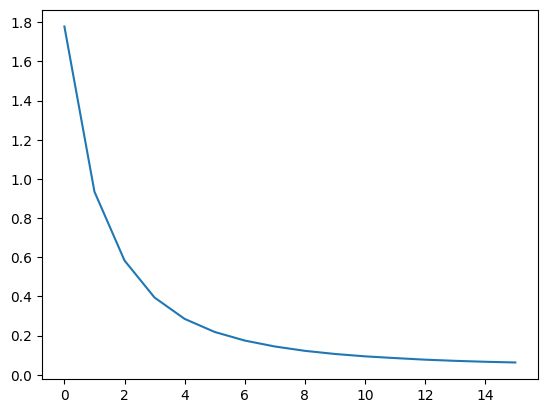

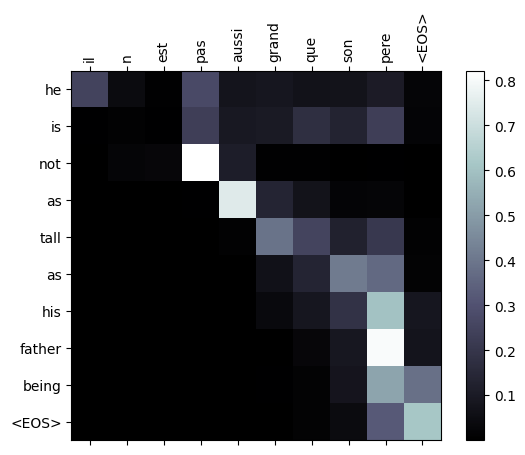

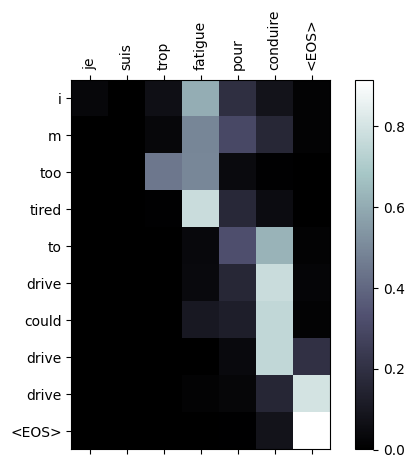

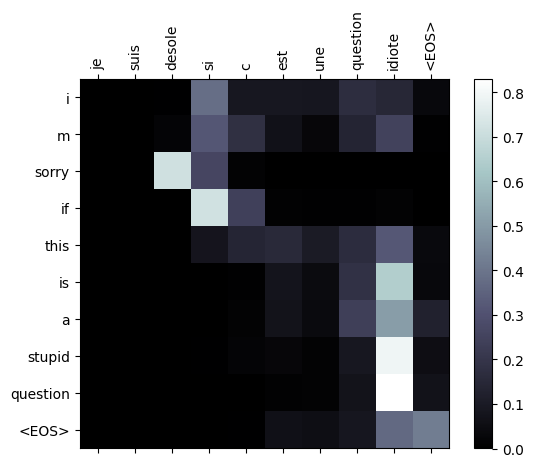

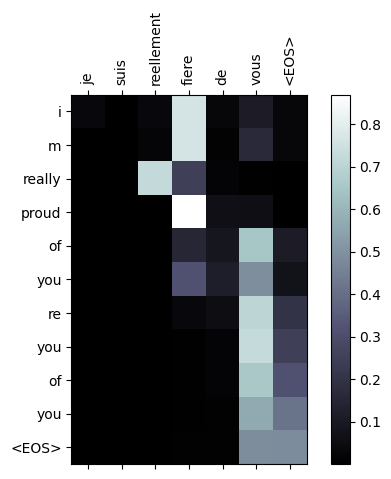

In [33]:
plt.show()

In [35]:
# Set the encoder model in evaluation mode (disable dropout and other training-specific operations),
# this ensures the model behaves appropriately during inference and doesn't consider gradients.
encoder.eval()
# Set the decoder model in evaluation mode for similar reasons as the encoder.
decoder.eval()

# Randomly evaluate trained encoder-decoder models on 10 sentences from the dataset.
# This function checks how well the models translate sentences and prints the results.
evaluate_randomly(encoder, decoder)

> je suis content que vous alliez a nouveau bien
= i m glad you re ok again
< i m glad you re ok again <EOS>

> je ne suis sur de rien
= i m not sure of anything
< i m not sure of anything opinion <EOS>

> jignore lesquelles
= i am not sure what
< i am not sure what the target is out <EOS>

> je suis fier du travail que j ai fait ici
= i m proud of the work i ve done here
< i m proud of the work i ve done here <EOS>

> ils sont en bas
= they re downstairs
< they re downstairs <EOS>

> ils ont raison
= they are right
< they are right to do so well <EOS>

> il ne faut pas nous deranger
= we are not to be disturbed
< we are not to be given our opportunity to follow <EOS>

> nous avons nettement ameliore cette directive
= we are making very considerable progress in this proposal
< we are making very concerned with the directive of this is very

> vous savez deja de quoi il sagit
= you are already aware of the matter
< you are already aware of the matter <EOS>

> je suis particulierement in

In [36]:
def show_attention(input_sentence, output_words, attentions):
    """
    Visualizes the attention weights for an input sentence and its translation.
    
    This function generates a heatmap of the attention weights, where rows represent the predicted 
    output words and columns represent the input words. The intensity of the heatmap indicates 
    how strongly each input word influences the corresponding output word.

    Args:
        input_sentence (str): The input sentence in the original language.
        output_words (list of str): The words of the predicted translation.
        attentions (torch.Tensor): The attention weights tensor of shape 
                                   [output_length, input_length] representing alignment scores.
    """
    # Create a new figure for the attention visualization
    fig = plt.figure()

    # Add a single subplot to the figure, occupying the entire figure space
    ax = fig.add_subplot(111)

    # Display the attention weights as a matrix (heatmap) using a grayscale colormap ('bone')
    # Convert the attention weights tensor to a NumPy array for visualization
    cax = ax.matshow(attentions.cpu().numpy(), cmap='bone')

    # Add a color bar to the side of the heatmap to provide a reference for intensity levels
    fig.colorbar(cax)

    # Set up the x-axis labels to include the input sentence split into words, as well as the <EOS> token
    # The rotation parameter rotates the labels vertically for better readability
    ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)

    # Set up the y-axis labels to include the predicted output words
    ax.set_yticklabels([''] + output_words)

    # Ensure that labels are shown at every tick on both axes (using a tick interval of 1)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # Render the plot on the screen
    plt.show()

In [37]:
def evaluate_and_show_attention(input_sentence):
    """
    Visualizes the attention weights for a given input sentence after translation. 
    It evaluates the input sentence using the trained encoder-decoder model, 
    then displays the input, the model's output, and the attention visualization.

    Args:
        input_sentence (str): The input sentence in the source language to be translated and visualized.

    Returns:
        None: Prints the input sentence, translated output, and displays the visualization.
    """
    # Evaluate the input sentence to get the predicted output words and attention weights
    output_words, attentions = evaluate(encoder, decoder, input_sentence, input_lang, output_lang)

    # Print the input sentence in the source language
    print('input =', input_sentence)
    # Print the translated sentence as predicted by the model
    print('output =', ' '.join(output_words))

    # Use the `show_attention` function to display a heatmap of attention weights
    show_attention(input_sentence, output_words, attentions[0, :len(output_words), :])

input = il n est pas aussi grand que son pere
output = he is not as tall as his father being <EOS>


/tmp/ipykernel_567326/2352707418.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
/tmp/ipykernel_567326/2352707418.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + output_words)


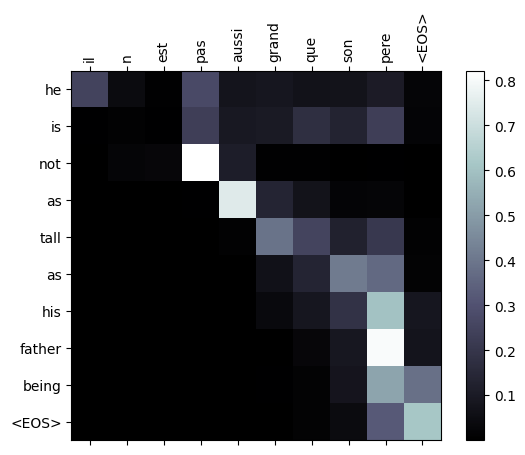

input = je suis trop fatigue pour conduire
output = i m too tired to drive could drive drive <EOS>


/tmp/ipykernel_567326/2352707418.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
/tmp/ipykernel_567326/2352707418.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + output_words)


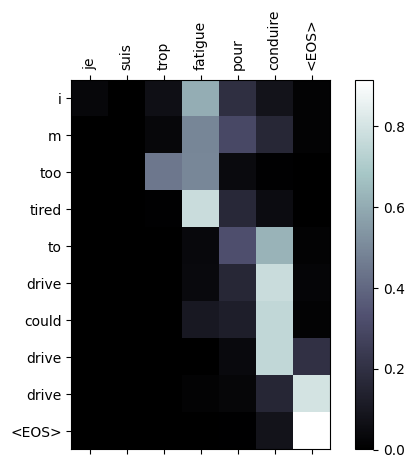

input = je suis desole si c est une question idiote
output = i m sorry if this is a stupid question <EOS>


/tmp/ipykernel_567326/2352707418.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
/tmp/ipykernel_567326/2352707418.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + output_words)


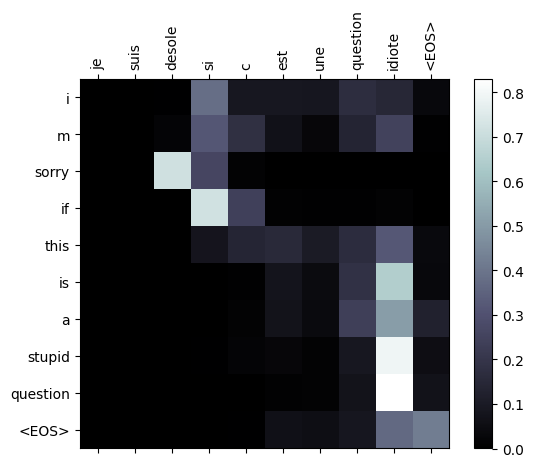

input = je suis reellement fiere de vous
output = i m really proud of you re you of you <EOS>


/tmp/ipykernel_567326/2352707418.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
/tmp/ipykernel_567326/2352707418.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + output_words)


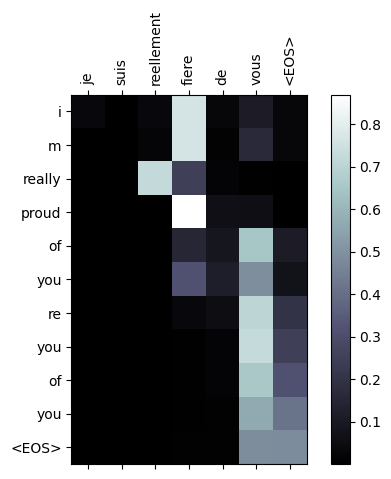

In [38]:
# Evaluate and visualize attention for the given sentence.
# Input: "il n est pas aussi grand que son pere" (French sentence translates to "he is not as tall as his father").
# The function will display the translation along with attention visualization between the input and output tokens.
evaluate_and_show_attention('il n est pas aussi grand que son pere')

# Evaluate and visualize attention for the given sentence.
# Input: "je suis trop fatigue pour conduire" (French sentence translates to "I am too tired to drive").
# The function will display the translation along with attention visualization between the input and output tokens.
evaluate_and_show_attention('je suis trop fatigue pour conduire')

# Evaluate and visualize attention for the given sentence.
# Input: "je suis desole si c est une question idiote" (French sentence translates to "I am sorry if it is a silly question").
# The function will display the translation along with attention visualization between the input and output tokens.
evaluate_and_show_attention('je suis desole si c est une question idiote')

# Evaluate and visualize attention for the given sentence.
# Input: "je suis reellement fiere de vous" (French sentence translates to "I am really proud of you").
# The function will display the translation along with attention visualization between the input and output tokens.
evaluate_and_show_attention('je suis reellement fiere de vous')